# Inteligencja Obliczeniowa w Analizie Danych Cyfrowych

##	Projekt I

### Autorzy
- Dominik Breksa
- Robert Barcik
- Konrad Bodzioch

In [12]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install easyAI

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from typing import Optional
from random import random

from easyAI import TwoPlayerGame, AI_Player, Human_Player


class Nimby(TwoPlayerGame):
    def __init__(self, players: Optional[list[AI_Player | Human_Player]] = None, max_removals_per_turn: Optional[int] = None, piles: Optional[list[int]] = None) -> None:
        if piles is None:
            piles = [5, 5, 5, 5]
        self.players: Optional[AI_Player | Human_Player] = players
        self.piles: Optional[list[int]] = piles
        self.max_removals_per_turn: Optional[int] = max_removals_per_turn
        self.current_player: int = 1

    def possible_moves(self) -> list[str]:
        return [
            "%d,%d" % (i + 1, j)
            for i in range(len(self.piles))
            for j in range(
                1,
                self.piles[i] + 1
                if self.max_removals_per_turn is None
                else min(self.piles[i] + 1, self.max_removals_per_turn),
            )
        ]

    def make_move(self, move: str) -> None:
        move = list(map(int, move.split(",")))
        #   Added randomness as described in the task
        if 0.1 >= random():
            remove: int = move[1] - 1
        else:
            remove: int = move[1]

        self.piles[move[0] - 1] -= remove

    def show(self) -> None:
        print(" ".join(map(str, self.piles)))

    def win(self) -> bool:
        return max(self.piles) == 0

    def is_over(self) -> bool:
        return self.win()

    def scoring(self) -> int:
        return 100 if self.win() else 0

    def ttentry(self) -> tuple:
        return tuple(self.piles)

In [15]:
from easyAI import AI_Player, Negamax
from easyAI.AI import TranspositionTable

#   Test
ai1 = Negamax(8, tt=TranspositionTable())
ai2 = Negamax(4, tt=TranspositionTable())
game = Nimby([AI_Player(ai1), AI_Player(ai2)])
game.play()
print("player %d wins" % game.current_player)

5 5 5 5

Move #1: player 1 plays 1,1 :
4 5 5 5

Move #2: player 2 plays 1,1 :
3 5 5 5

Move #3: player 1 plays 1,1 :
2 5 5 5

Move #4: player 2 plays 1,1 :
1 5 5 5

Move #5: player 1 plays 2,1 :
1 4 5 5

Move #6: player 2 plays 1,1 :
0 4 5 5

Move #7: player 1 plays 3,5 :
0 4 0 5

Move #8: player 2 plays 2,1 :
0 3 0 5

Move #9: player 1 plays 2,3 :
0 0 0 5

Move #10: player 2 plays 4,4 :
0 0 0 1

Move #11: player 1 plays 4,1 :
0 0 0 0
player 2 wins


### Deterministic

In [16]:
from itertools import product
from typing import Final

#   TODO: Change from matrix to linear

max_depth: Final[int] = 16

df: pd.DataFrame = pd.DataFrame(
    columns=['game_variant', 'algorithm', 'player_depths', 'winner', 'time', 'rounds'])

config: list[tuple[int, int]] = list(product(range(1, max_depth + 1), repeat=2))

config

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (7, 10),
 (7

In [17]:
from time import perf_counter

from easyAI.games import Nim

def play_game(player_depths: tuple[int, int]) -> tuple[int, float, int]:
    player1_depth, player2_depth = player_depths
    ai_1: Negamax = Negamax(player1_depth, tt=TranspositionTable())
    ai_2: Negamax = Negamax(player2_depth, tt=TranspositionTable())
    environment: Nim = Nim([AI_Player(ai_1), AI_Player(ai_2)])
    
    start: float = perf_counter()
    history: list = environment.play()
    end: float = perf_counter()
    
    return environment.current_player, end - start, len(history) - 1

results: map = map(play_game, config)
for player_depths, (winner, elapsed_time, rounds) in zip(config, results):
    print(f'========== Finished(depths={player_depths}, winner={winner}, time={elapsed_time}s, rounds_number={rounds}) ==========')
    df.loc[len(df)] = ['Nim', 'Negamax', np.asarray(player_depths), np.uint8(winner), elapsed_time, np.uint8(rounds)]

5 5 5 5

Move #1: player 1 plays 1,1 :
4 5 5 5

Move #2: player 2 plays 1,1 :
3 5 5 5

Move #3: player 1 plays 1,1 :
2 5 5 5

Move #4: player 2 plays 1,1 :
1 5 5 5

Move #5: player 1 plays 1,1 :
0 5 5 5

Move #6: player 2 plays 2,1 :
0 4 5 5

Move #7: player 1 plays 2,1 :
0 3 5 5

Move #8: player 2 plays 2,1 :
0 2 5 5

Move #9: player 1 plays 2,1 :
0 1 5 5

Move #10: player 2 plays 2,1 :
0 0 5 5

Move #11: player 1 plays 3,1 :
0 0 4 5

Move #12: player 2 plays 3,1 :
0 0 3 5

Move #13: player 1 plays 3,1 :
0 0 2 5

Move #14: player 2 plays 3,1 :
0 0 1 5

Move #15: player 1 plays 3,1 :
0 0 0 5

Move #16: player 2 plays 4,1 :
0 0 0 4

Move #17: player 1 plays 4,1 :
0 0 0 3

Move #18: player 2 plays 4,1 :
0 0 0 2

Move #19: player 1 plays 4,1 :
0 0 0 1

Move #20: player 2 plays 4,1 :
0 0 0 0
========== Finished(depths=(1, 1), winner=1, time=0.0027102999993076082s, rounds_number=20) ==========
5 5 5 5

Move #1: player 1 plays 1,1 :
4 5 5 5

Move #2: player 2 plays 1,1 :
3 5 5 5

Move #3: pl

In [18]:
df.dtypes

game_variant      object
algorithm         object
player_depths     object
winner             uint8
time             float64
rounds             uint8
dtype: object

In [19]:
df

,game_variant,algorithm,player_depths,winner,time,rounds
0,Nim,Negamax,"[1, 1]",1,0.002710,20
1,Nim,Negamax,"[1, 2]",2,0.007203,17
2,Nim,Negamax,"[1, 3]",2,0.013361,17
3,Nim,Negamax,"[1, 4]",2,0.032763,17
4,Nim,Negamax,"[1, 5]",2,0.054585,17
...,...,...,...,...,...,...
251,Nim,Negamax,"[16, 12]",2,0.324800,19
252,Nim,Negamax,"[16, 13]",2,0.318488,17
253,Nim,Negamax,"[16, 14]",2,0.313856,17
254,Nim,Negamax,"[16, 15]",2,0.347190,17


In [20]:
def convert_to_matrix(data: pd.DataFrame, column_name: str) -> np.ndarray:
    output: np.ndarray = np.zeros((max_depth, max_depth), dtype=np.uint8)
    
    for _, row in data.iterrows():
        output[row['player_depths'][0] - 1, row['player_depths'][1] - 1] = row[column_name]
        
    return output

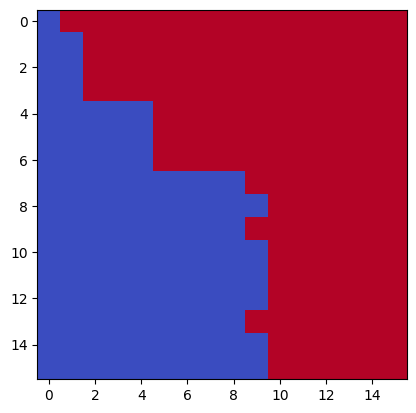

In [27]:
win_matrix: np.ndarray = convert_to_matrix(df, 'winner')
plt.imshow(win_matrix, cmap='coolwarm')

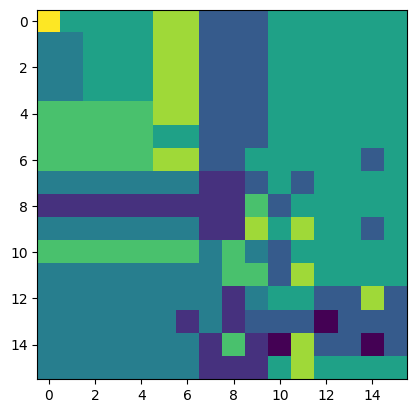

In [22]:
duration_matrix: np.ndarray = convert_to_matrix(df, 'rounds')
plt.imshow(duration_matrix)

In [26]:
df['avg_round_time'] = (df['time'] / df['rounds']).astype(np.float32)
df

,game_variant,algorithm,player_depths,winner,time,rounds,avg_round_time
0,Nim,Negamax,"[1, 1]",1,0.002710,20,0.000136
1,Nim,Negamax,"[1, 2]",2,0.007203,17,0.000424
2,Nim,Negamax,"[1, 3]",2,0.013361,17,0.000786
3,Nim,Negamax,"[1, 4]",2,0.032763,17,0.001927
4,Nim,Negamax,"[1, 5]",2,0.054585,17,0.003211
...,...,...,...,...,...,...,...
251,Nim,Negamax,"[16, 12]",2,0.324800,19,0.017095
252,Nim,Negamax,"[16, 13]",2,0.318488,17,0.018735
253,Nim,Negamax,"[16, 14]",2,0.313856,17,0.018462
254,Nim,Negamax,"[16, 15]",2,0.347190,17,0.020423


### Non-Deterministic

In [23]:
custom_depths: list[tuple[int, int]] = [
    (4, 4),
    (4, 8),
    (8, 4),
    (8, 8),
    (8, 12),
    (12, 8),
    (12, 12),
    (12, 16),
    (16, 12),
    (16, 16),
]

repeat_count: Final[int] = 20